In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.	Data Collection

In [36]:
df=pd.read_csv(r"C:\Users\Harshal Malve\Documents\BIA -Class\Capstone project\Automobile\imports_85_data.csv",encoding='unicode_escape')


In [37]:
df.head()


,col2,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   col2                    164 non-null    float64
 1   Make_Car_Manufacturer   205 non-null    object 
 2   Fuel_Type               205 non-null    object 
 3   Aspiration              205 non-null    object 
 4   Number_of_Doors         205 non-null    object 
 5   Body_Style              205 non-null    object 
 6   Drive_Wheels            205 non-null    object 
 7   Engine_Location         205 non-null    object 
 8   Wheelbase_inches        205 non-null    float64
 9   Length_inches           205 non-null    float64
 10  Width_inches            205 non-null    float64
 11  Height_inches           205 non-null    float64
 12  Curb_Weight_pounds      205 non-null    int64  
 13  Engine_Type             205 non-null    object 
 14  Number_of_Cylinders     205 non-null    ob

##  2.	Data Preprocessing

In [39]:
df.isnull().sum()  #handling missing values

col2                      41
Make_Car_Manufacturer      0
Fuel_Type                  0
Aspiration                 0
Number_of_Doors            0
Body_Style                 0
Drive_Wheels               0
Engine_Location            0
Wheelbase_inches           0
Length_inches              0
Width_inches               0
Height_inches              0
Curb_Weight_pounds         0
Engine_Type                0
Number_of_Cylinders        0
EngineSize_cubicinches     0
Fuel_System                0
Bore_Ratio                 4
Stroke                     4
Compression_Ratio          0
Horsepower                 2
Peak_RPM                   2
City_MPG                   0
Highway_MPG                0
Price_Dollars              4
Coumn_Z                    0
dtype: int64

<Axes: >

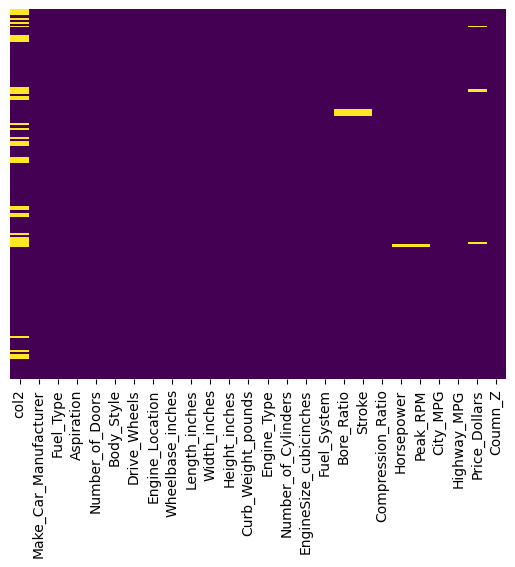

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [41]:
 df.drop('col2',axis=1,inplace=True)

In [42]:
print(df.columns)

Index(['Make_Car_Manufacturer', 'Fuel_Type', 'Aspiration', 'Number_of_Doors',
       'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Wheelbase_inches',
       'Length_inches', 'Width_inches', 'Height_inches', 'Curb_Weight_pounds',
       'Engine_Type', 'Number_of_Cylinders', 'EngineSize_cubicinches',
       'Fuel_System', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
       'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Price_Dollars',
       'Coumn_Z'],
      dtype='object')


In [43]:
#filling Null values of 'Price_Dollars' with avrage cost of vehicles with specific 'Number_of_Cylinders'
dfavg_price_series = df.groupby('Number_of_Cylinders')['Price_Dollars'].mean()

In [44]:
dfavg_price_series

Number_of_Cylinders
eight     38900.000000
five      22007.600000
four      10303.197452
six       23671.833333
three      5151.000000
twelve    36000.000000
two       13020.000000
Name: Price_Dollars, dtype: float64

In [45]:
def impute_Price(cols):
    Price_Dollars = cols[0]
    Number_of_Cylinders = cols[1]
    
    if pd.isnull(Price_Dollars):

        if Number_of_Cylinders == "eight":
            return 38900

        elif Number_of_Cylinders == "five":
            return 22007.60

        elif Number_of_Cylinders == "four":
            return 10303.19

        elif Number_of_Cylinders == "six":
            return 23671.83

        elif Number_of_Cylinders == "three":
            return 5151

        elif Number_of_Cylinders == "twelve":
            return 36000

        elif Number_of_Cylinders == "two":
            return 13020

    else:
        return Price_Dollars

In [46]:
df['Price_Dollars'] = df[['Price_Dollars','Number_of_Cylinders']].apply(impute_Price,axis=1)

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_11512\903743149.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Price_Dollars = cols[0]
C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_11512\903743149.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Number_of_Cylinders = cols[1]


<Axes: >

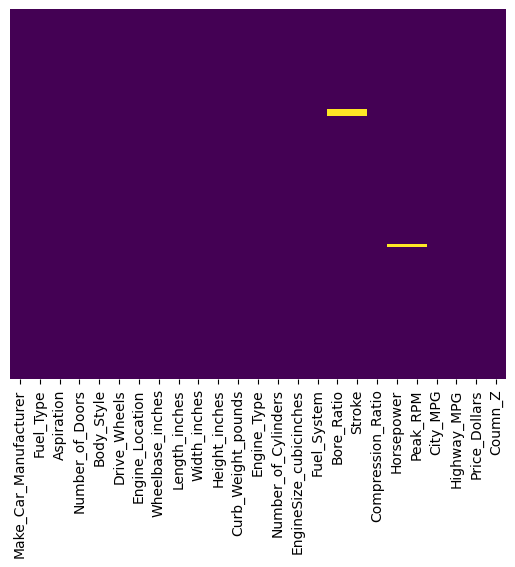

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
#Rotory engines defies the traditional bore and stroke conventions.                                                      
#but we can not keep the cell Empty hence we are using best way to fill it which is KNN Imputation (k-nearest neighbors).
#KNN Locates the k nearest data points (neighbors) based on similarity (usually Euclidean distance). - Checks their values for the missing feature. - 
#Takes an average (or weighted average) of those values.

from sklearn.impute import KNNImputer

In [49]:
imputer = KNNImputer(n_neighbors=20)  # Choose an appropriate value for 'n_neighbors'
imputed_values = imputer.fit_transform(df[['Bore_Ratio', 'Stroke']])  ## Fit and transform the imputer on your original DataFrame
df_imputed = pd.DataFrame(imputed_values, columns=['Bore_Ratio', 'Stroke'])   #The DataFrame is a fundamental data structure provided by the Pandas library in Python. 
df.update(df_imputed)

In [50]:
#Peak Rpm and Horsepower is also has some NaN values and if we take avrage of any parameters it could be "Engine size".
#but we can not take average parameters from Engine size as it is not catgorical hence decided to go with KNN Imputation 
#for Empty cells in Peak RPM and Horsepower.


imputed_values = imputer.fit_transform(df[['Peak_RPM', 'Horsepower']])
df_imputed = pd.DataFrame(imputed_values, columns=['Peak_RPM', 'Horsepower'])   #The DataFrame is a fundamental data structure provided by the Pandas library in Python. 
df.update(df_imputed)


In [51]:
df.isnull().sum()

Make_Car_Manufacturer     0
Fuel_Type                 0
Aspiration                0
Number_of_Doors           0
Body_Style                0
Drive_Wheels              0
Engine_Location           0
Wheelbase_inches          0
Length_inches             0
Width_inches              0
Height_inches             0
Curb_Weight_pounds        0
Engine_Type               0
Number_of_Cylinders       0
EngineSize_cubicinches    0
Fuel_System               0
Bore_Ratio                0
Stroke                    0
Compression_Ratio         0
Horsepower                0
Peak_RPM                  0
City_MPG                  0
Highway_MPG               0
Price_Dollars             0
Coumn_Z                   0
dtype: int64

In [52]:
df.head()

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [53]:
print(df['Fuel_Type'].unique())
print(df['Number_of_Doors'].unique())  #replace '?"
print(df['Body_Style'].unique())
print(df['Drive_Wheels'].unique())
print(df['Engine_Location'].unique())
print(df['Engine_Type'].unique())
print(df['Number_of_Cylinders'].unique())
print(df['Fuel_System'].unique())


['gas' 'diesel']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [54]:
#Deleting '?' from " Number_of_Doors

#replace the symbol ‘?’ with NaN (missing values) in a column of a DataFrame
df['Number_of_Doors'] = df['Number_of_Doors'].replace('?', float('nan'))

#Replace missing values with the most frequent category (mode) within the column.
#This approach maintains the existing distribution of categories.
df['Number_of_Doors'].fillna(df['Number_of_Doors'].mode()[0], inplace=True)
print(df['Number_of_Doors'].unique()) 
df['Number_of_Doors'].value_counts()

['two' 'four']


Number_of_Doors
four    116
two      89
Name: count, dtype: int64

#<font size="4"> Encoding </font>

#<font size="2">
 *****We’ll use Lable encoding for the following columns:
'Fuel_Type'                                               
'Aspiration'                                               
'Number_of_Doors'                                             
'Drive_Wheels'                                                
'Engine_Location'                                           
'Number_of_Cylinders'                                        
Reason: hot-not encoding was causing “curse of dimensionality” (too much colums) and encding with 0,1,2.... per weightage on Car price. </font>



#<font size="2">
*****We’ll apply frequency encoding to the following columns:                       
'Make_Car_Manufacturer'                               
'Body_Style'                                 
'Engine_Type'                          
'Fuel_System'rs'                                      
Reason: These columns have multiple categories, and frequency encoding assigns values based on the relative occurrence of each category. </font>


In [55]:
print(df['Fuel_Type'].unique())
print(df['Number_of_Doors'].unique())  #replace '?"
print(df['Body_Style'].unique())
print(df['Drive_Wheels'].unique())
print(df['Engine_Location'].unique())
print(df['Engine_Type'].unique())
print(df['Number_of_Cylinders'].unique())
print(df['Fuel_System'].unique())
print(df['Aspiration'].unique())
print(df['Number_of_Cylinders'].unique())


['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['std' 'turbo']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [56]:
#'Fuel_Type', 'Aspiration' ,'Number_of_Doors' ,'Drive_Wheels' ,'Engine_Location'
df.replace({'Fuel_Type':{'gas':0,'diesel':1}},inplace=True)
df.replace({'Aspiration':{'std':0,'turbo':1}},inplace=True)
df.replace({'Number_of_Doors':{'two':0,'four':1}},inplace=True)
df.replace({'Drive_Wheels':{'rwd':2,'fwd':0,'4wd':1}},inplace=True)
df.replace({'Engine_Location':{'front':0,'rear':1}},inplace=True)
df.replace({'Number_of_Cylinders':{'four':2,'six':5,'five':4,'three':1,'twelve':7,'two':3,'eight':6}},inplace=True)
df

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,alfa-romero,0,0,0,hatchback,2,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,audi,0,0,1,sedan,0,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,audi,0,0,1,sedan,1,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,volvo,0,1,1,sedan,2,0,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,volvo,1,1,1,sedan,2,0,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


In [57]:
selected_columns = ['Make_Car_Manufacturer','Body_Style' ,'Engine_Type', 'Fuel_System' ]

for col in selected_columns:
    category_counts = df[col].value_counts()
    category_mapping = category_counts.to_dict()
    df[f'{col}_FrequencyEncoded'] = df[col].map(category_mapping)

df

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,111.0,5000.0,21,27,13495.0,3,3,6,12,94
1,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,111.0,5000.0,21,27,16500.0,3,3,6,12,94
2,alfa-romero,0,0,0,hatchback,2,0,94.5,171.2,65.5,...,154.0,5000.0,19,26,16500.0,1,3,70,13,94
3,audi,0,0,1,sedan,0,0,99.8,176.6,66.2,...,102.0,5500.0,24,30,13950.0,2,7,96,148,94
4,audi,0,0,1,sedan,1,0,99.4,176.6,66.4,...,115.0,5500.0,18,22,17450.0,2,7,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,114.0,5400.0,23,28,16845.0,-1,11,96,148,94
201,volvo,0,1,1,sedan,2,0,109.1,188.8,68.8,...,160.0,5300.0,19,25,19045.0,-1,11,96,148,94
202,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,134.0,5500.0,18,23,21485.0,-1,11,96,13,94
203,volvo,1,1,1,sedan,2,0,109.1,188.8,68.9,...,106.0,4800.0,26,27,22470.0,-1,11,96,148,20


In [58]:
#Droping original colums with Objecs(Str)

# 'Make_Car_Manufacturer' ,'Body_Style' ,'Engine_Type' ,'Number_of_Cylinders', 'Fuel_System'
# 'Fuel_Type', 'Aspiration' ,'Number_of_Doors' ,'Drive_Wheels' ,'Engine_Location'

df = df.drop(['Make_Car_Manufacturer','Body_Style' ,'Engine_Type' , 'Fuel_System' ], axis=1)
df

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,111.0,5000.0,21,27,13495.0,3,3,6,12,94
1,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,111.0,5000.0,21,27,16500.0,3,3,6,12,94
2,0,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,154.0,5000.0,19,26,16500.0,1,3,70,13,94
3,0,0,1,0,0,99.8,176.6,66.2,54.3,2337,...,102.0,5500.0,24,30,13950.0,2,7,96,148,94
4,0,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,115.0,5500.0,18,22,17450.0,2,7,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,2,0,109.1,188.8,68.9,55.5,2952,...,114.0,5400.0,23,28,16845.0,-1,11,96,148,94
201,0,1,1,2,0,109.1,188.8,68.8,55.5,3049,...,160.0,5300.0,19,25,19045.0,-1,11,96,148,94
202,0,0,1,2,0,109.1,188.8,68.9,55.5,3012,...,134.0,5500.0,18,23,21485.0,-1,11,96,13,94
203,1,1,1,2,0,109.1,188.8,68.9,55.5,3217,...,106.0,4800.0,26,27,22470.0,-1,11,96,148,20


In [59]:
#moving price Column to last for beter understanding

price_column = df.pop('Price_Dollars')  # Remove the "price" column
df.insert(len(df.columns), 'Price_Dollars', price_column)  # Insert it at the last position

## 3.	Feature Engineering

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fuel_Type                               205 non-null    int64  
 1   Aspiration                              205 non-null    int64  
 2   Number_of_Doors                         205 non-null    int64  
 3   Drive_Wheels                            205 non-null    int64  
 4   Engine_Location                         205 non-null    int64  
 5   Wheelbase_inches                        205 non-null    float64
 6   Length_inches                           205 non-null    float64
 7   Width_inches                            205 non-null    float64
 8   Height_inches                           205 non-null    float64
 9   Curb_Weight_pounds                      205 non-null    int64  
 10  Number_of_Cylinders                     205 non-null    int64 

In [61]:
df.describe()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded,Price_Dollars
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000
mean,0.097561,0.180488,0.565854,0.785366,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,...,104.256158,5125.369458,25.219512,30.751220,0.834146,14.24878,72.395122,110.258537,67.341463,13347.058439
std,0.297446,0.385535,0.496858,0.956290,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,...,39.519211,476.979093,6.542142,6.886443,1.245307,8.67109,28.839736,60.985023,31.195156,8099.139500
min,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,48.000000,4150.000000,13.000000,16.000000,-2.000000,1.00000,6.000000,1.000000,1.000000,5118.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,70.000000,4800.000000,19.000000,25.000000,0.000000,8.00000,70.000000,15.000000,66.000000,7788.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,95.000000,5200.000000,24.000000,30.000000,1.000000,12.00000,70.000000,148.000000,66.000000,10303.190000
75%,0.000000,0.000000,1.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,116.000000,5500.000000,30.000000,34.000000,2.000000,17.00000,96.000000,148.000000,94.000000,16503.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,288.000000,6600.000000,49.000000,54.000000,3.000000,32.00000,96.000000,148.000000,94.000000,45400.000000


In [62]:
df.corr()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded,Price_Dollars
Fuel_Type,1.000000,0.401397,0.188496,0.108444,-0.040070,0.308346,0.212679,0.233880,0.284631,0.217275,...,-0.165190,-0.477060,0.255963,0.191392,-0.194311,0.017152,0.082914,0.020221,-0.500202,0.101378
Aspiration,0.401397,1.000000,0.052803,0.132180,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,...,0.240182,-0.183629,-0.202362,-0.254416,-0.059866,-0.190924,0.040728,-0.019299,-0.305133,0.177930
Number_of_Doors,0.188496,0.052803,1.000000,-0.062958,-0.139129,0.439635,0.385675,0.197735,0.540286,0.190720,...,-0.128184,-0.240298,-0.014271,-0.037452,-0.663595,0.010401,0.240549,0.031548,0.084882,0.017442
Drive_Wheels,0.108444,0.132180,-0.062958,1.000000,0.155168,0.490310,0.535304,0.502621,0.071943,0.683192,...,0.570042,-0.108376,-0.567549,-0.596940,-0.091783,-0.053236,-0.165942,-0.440830,0.238927,0.630695
Engine_Location,-0.040070,-0.057191,-0.139129,0.155168,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,...,0.317610,0.198400,-0.153487,-0.102026,0.212471,-0.130304,-0.275601,-0.190822,0.104399,0.319487
Wheelbase_inches,0.308346,0.257611,0.439635,0.490310,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,...,0.351957,-0.360704,-0.470414,-0.544082,-0.531954,-0.111284,0.092560,-0.204521,0.167886,0.568802
Length_inches,0.212679,0.234539,0.385675,0.535304,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,...,0.554434,-0.287031,-0.670909,-0.704662,-0.357612,-0.150540,0.008815,-0.274458,0.298404,0.672603
Width_inches,0.233880,0.300567,0.197735,0.502621,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,...,0.642195,-0.219859,-0.642704,-0.677218,-0.232919,-0.236780,0.020876,-0.289254,0.203591,0.763037
Height_inches,0.284631,0.087311,0.540286,0.071943,-0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,...,-0.110137,-0.320602,-0.048640,-0.107358,-0.541038,0.024462,-0.037251,0.040967,0.117083,0.108763
Curb_Weight_pounds,0.217275,0.324902,0.190720,0.683192,0.050468,0.776386,0.877728,0.867032,0.295572,1.000000,...,0.750968,-0.266283,-0.757414,-0.797465,-0.227691,-0.215470,-0.111291,-0.414040,0.233395,0.831253


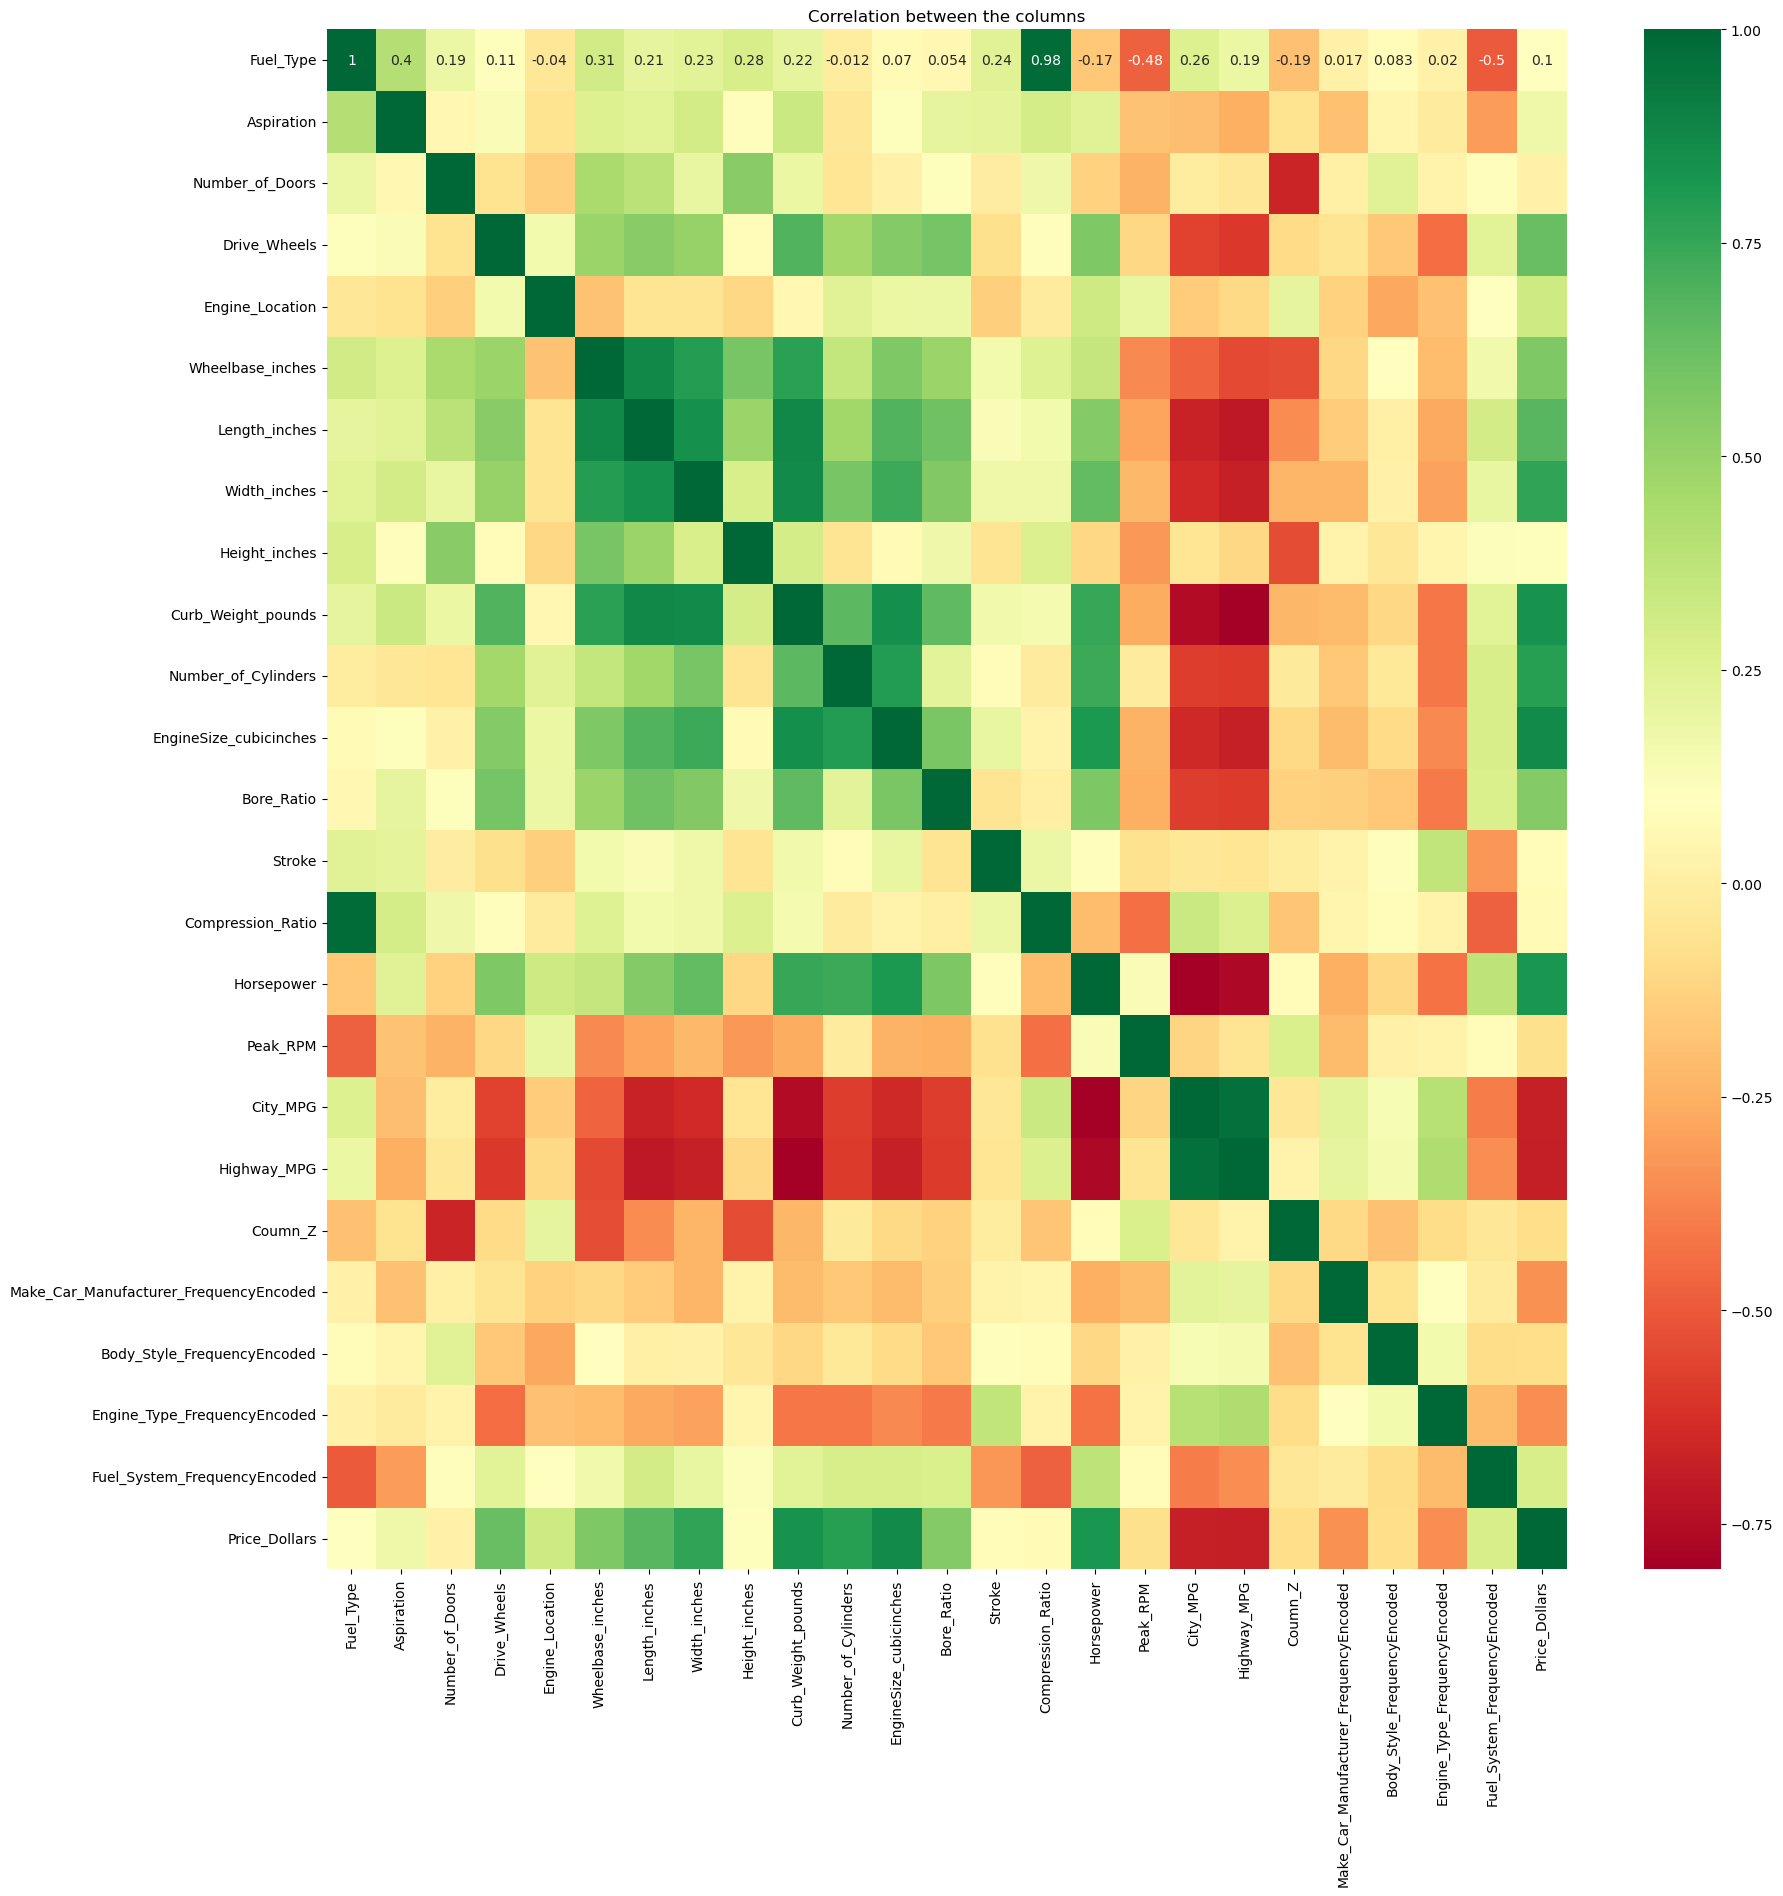

In [63]:
#Heatmap to check co-relation between the columns for Price of car.

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn")
plt.title('Correlation between the columns')
plt.show()

In [64]:
print(df.columns)

Index(['Fuel_Type', 'Aspiration', 'Number_of_Doors', 'Drive_Wheels',
       'Engine_Location', 'Wheelbase_inches', 'Length_inches', 'Width_inches',
       'Height_inches', 'Curb_Weight_pounds', 'Number_of_Cylinders',
       'EngineSize_cubicinches', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
       'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Coumn_Z',
       'Make_Car_Manufacturer_FrequencyEncoded', 'Body_Style_FrequencyEncoded',
       'Engine_Type_FrequencyEncoded', 'Fuel_System_FrequencyEncoded',
       'Price_Dollars'],
      dtype='object')



# Gradient Boosting_XGBoost- Model 3


In [65]:
X=df.iloc[:,:-1] ## independent features

y=df.iloc[:,-1] ## dependent features

In [67]:
X

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,9.0,111.0,5000.0,21,27,3,3,6,12,94
1,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,9.0,111.0,5000.0,21,27,3,3,6,12,94
2,0,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,9.0,154.0,5000.0,19,26,1,3,70,13,94
3,0,0,1,0,0,99.8,176.6,66.2,54.3,2337,...,10.0,102.0,5500.0,24,30,2,7,96,148,94
4,0,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,8.0,115.0,5500.0,18,22,2,7,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,2,0,109.1,188.8,68.9,55.5,2952,...,9.5,114.0,5400.0,23,28,-1,11,96,148,94
201,0,1,1,2,0,109.1,188.8,68.8,55.5,3049,...,8.7,160.0,5300.0,19,25,-1,11,96,148,94
202,0,0,1,2,0,109.1,188.8,68.9,55.5,3012,...,8.8,134.0,5500.0,18,23,-1,11,96,13,94
203,1,1,1,2,0,109.1,188.8,68.9,55.5,3217,...,23.0,106.0,4800.0,26,27,-1,11,96,148,20


In [68]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: Price_Dollars, Length: 205, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
import xgboost as xgb

In [73]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9985335133085556


In [75]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8966611470083474


In [76]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [77]:
score.mean()

0.7361333357207676

#### Model Evaluation

In [78]:
prediction=regressor.predict(X_test)

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_11512\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_Dollars', ylabel='Density'>

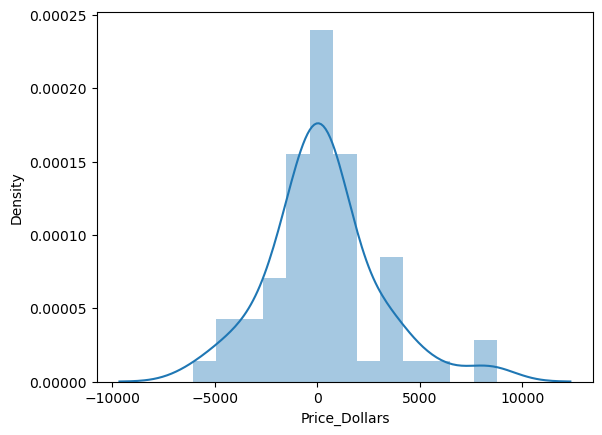

In [79]:
sns.distplot(y_test-prediction)

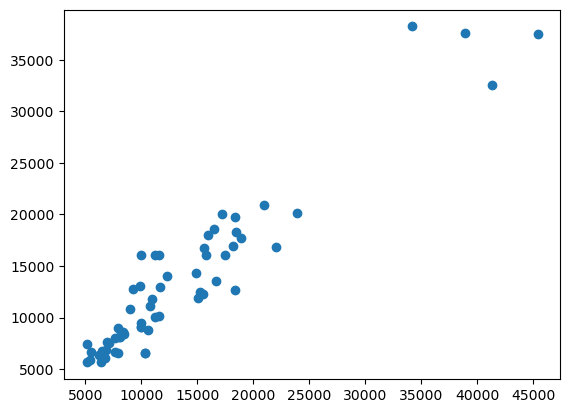

In [80]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning

In [82]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [85]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]



In [86]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [87]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [88]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [89]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   3.8s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   4.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   4.0s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.2s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
xg_random.best_params_

{'subsample': 0.7,
 'n_estimators': 800,
 'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [92]:
xg_random.best_score_

-5791801.978586227

In [94]:
predictions=xg_random.predict(X_test)

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_11512\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_Dollars', ylabel='Density'>

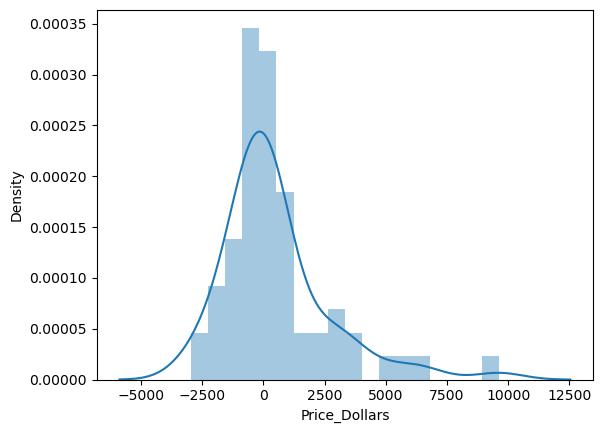

In [95]:
sns.distplot(y_test-predictions)

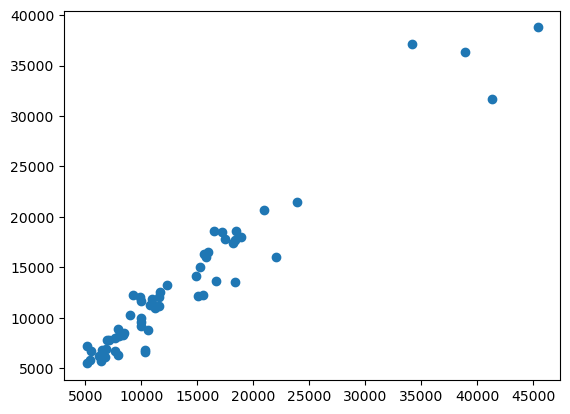

In [96]:
plt.scatter(y_test,predictions)

In [97]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1421.785394405242
MSE: 5116221.934547967
RMSE: 2261.906703325309
